# 1. Exploratory data analysis  

In [8]:
%reset -f

1.1 Import the libraries 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd 
from   sklearn                import datasets

# data graphing
import matplotlib.pyplot as plt
import seaborn as sns

# data pre-processing
from   sklearn                import model_selection
from   sklearn                import preprocessing
from   sklearn.preprocessing  import StandardScaler

# unsupervised : k-means clustering
from   scipy                  import stats 
from   sklearn.cluster        import KMeans
from   sklearn.decomposition  import PCA
from   sklearn.metrics        import silhouette_score

# unsupervised : evaluation 
from   sklearn.metrics        import confusion_matrix, classification_report

# supervised : classification
from   sklearn.linear_model   import LogisticRegression
from   sklearn.tree           import DecisionTreeClassifier
from   sklearn.ensemble       import RandomForestClassifier
from   sklearn                import tree
from   sklearn.neural_network import MLPClassifier

# supervised : regression
from   sklearn                import metrics, linear_model
from sklearn.linear_model     import Ridge
from sklearn.ensemble         import GradientBoostingRegressor

# ignore warning
from   warnings               import filterwarnings
filterwarnings('ignore')

1.2 Import and inspect the dataset

    Link to the data set - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


1.3 Check class imbalance 

In [5]:
classes = df['Class'].value_counts()

# calculate percentage share of non-fraudulent transactions
non_fraud_share = classes[0]/df['Class'].count()*100

# calculate percentage share of fraudulent transactions
fraud_share = classes[1]/df['Class'].count()*100

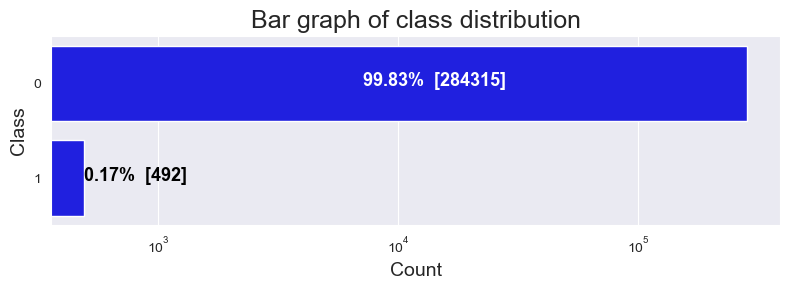

In [132]:
# create a bar plot for non-fraudulent and fraudulent transcations
fig, ax = plt.subplots(figsize = (8, 3))
sns.barplot(x = classes, y = classes.index, orient = 'h', ax = ax, color = 'blue')

# set log scale on x-axis
ax.set_xscale('log'), 

# set labels
ax.set_xlabel('Count', fontsize = 14)
ax.set_ylabel('Class', fontsize = 14)
ax.set(xscale='log', xlabel = 'Count', ylabel='Class')
ax.set_title('Bar graph of class distribution', fontsize=18)
bars = []

# display counts and percentages
for patch in ax.patches:
    bars.append(patch)
ax.text(bars[0].get_width()/2 - 135000, bars[0].get_y() +0.43, 
        str(round(non_fraud_share, 2))+'%  '+'['+str(classes[0])+']', 
        fontsize = 13, fontweight = 'bold', color = 'white')
ax.text(bars[1].get_width()+ 0.9, bars[1].get_y()+0.43, 
        str(round(fraud_share, 2))+'%  '+'['+str(classes[1])+']', 
        fontsize = 13, fontweight = 'bold', color = 'black')

# graph the plot
plt.tight_layout()
plt.show()

1.3 Analyze predictor's distribution 

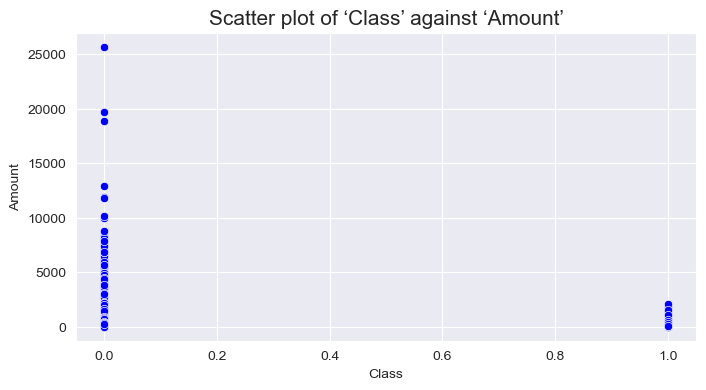

In [130]:
# plot 'Class' against 'Amount' for visual pattern detection
fig, ax = plt.subplots(figsize = (8, 4))
sns.scatterplot(x = df['Class'], y = df['Amount'], ax = ax, color ='blue')
ax.set_title('Scatter plot of ‘Class’ against ‘Amount’', fontsize = 15)
plt.show()

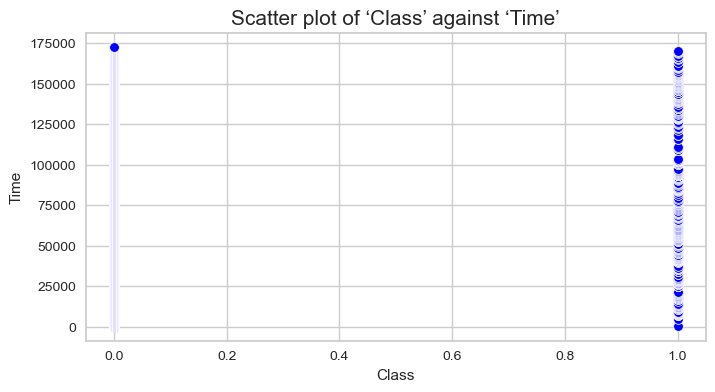

In [8]:
# plot 'Class' against 'Time' for visual pattern detection
fig, ax = plt.subplots(figsize = (8, 4))
sns.scatterplot(x = df['Class'], y = df['Time'], ax = ax, color ='blue')
ax.set_title('Scatter plot of ‘Class’ against ‘Time’', fontsize = 15)
plt.show()

1.4 Plot the distribution of PCA transformed columns (V1 to V28)

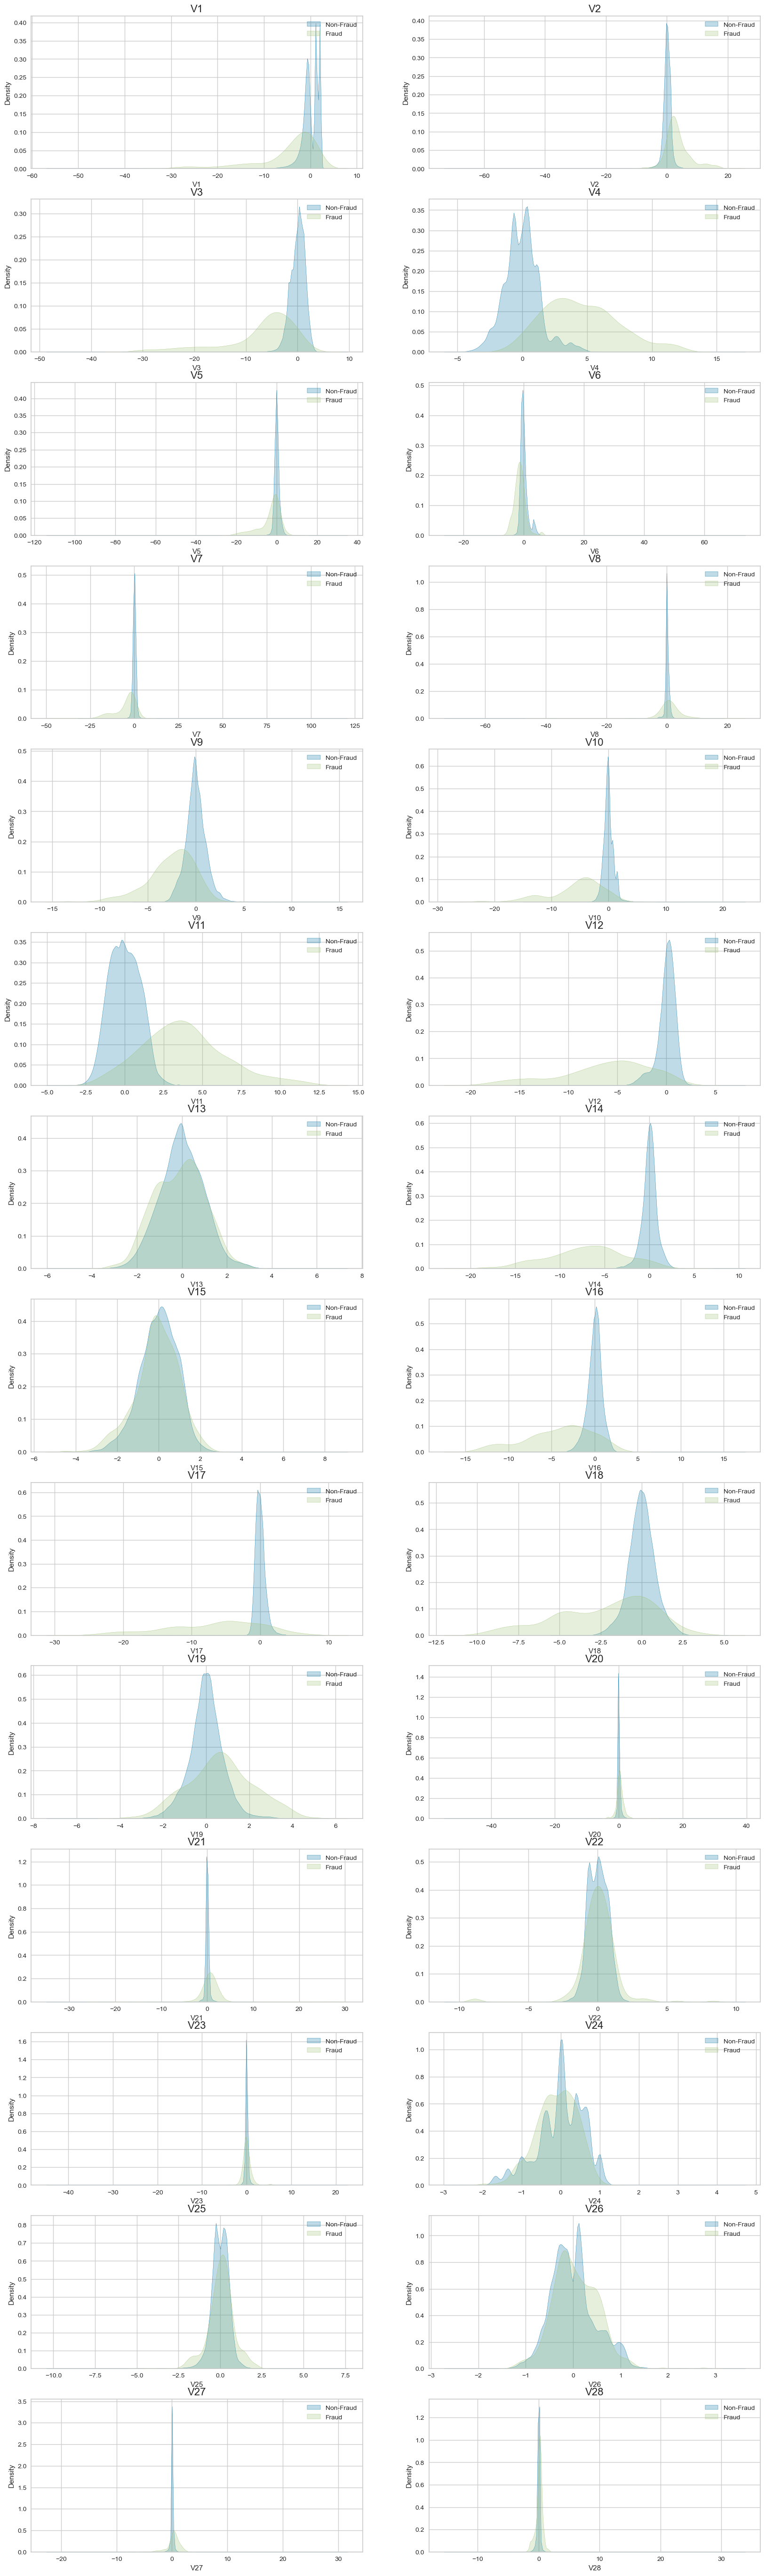

In [9]:
# set figure and grid
num_cols = 2
num_rows = 14
fig = plt.figure(figsize = (20, 14*5))
grid = plt.GridSpec(num_rows, num_cols, figure = fig)
i = 0

# plot distribution using for loop
for i in range(1, 29):
    col = 'V'+ str(i)
    non_fraud = df.loc[df.Class == 0][col]
    fraud = df.loc[df.Class == 1][col]
    ax = plt.subplot(grid[i-1])
    ax = sns.kdeplot(non_fraud, fill = True)
    ax = sns.kdeplot(fraud, fill = True)
    ax.set_title(col, fontsize = 16)
    plt.legend(labels = ['Non-Fraud', 'Fraud'])

# graph the plot
plt.show()

1.5 Drop columns

In [3]:
drop_cols = ['Time', 'V13', 'V15', 'V22', 'V24', 'V25', 'V26', 'V28']
df = df.drop(drop_cols, axis = 1)

1.6 Checking for null values

In [10]:
df.isnull().any()

V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V14       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V23       False
V27       False
Amount    False
Class     False
dtype: bool

# 2. Unsupervised learning

2.1 Implement elbow method to determine optimal number of k clusters

2.2 K-means clustering 

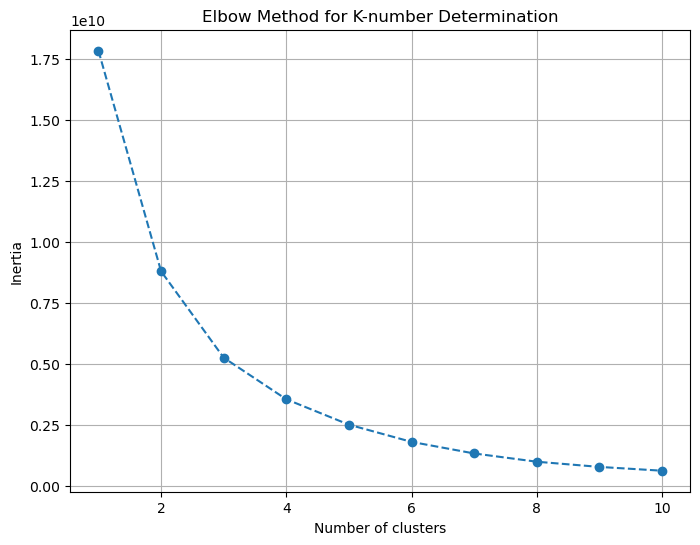

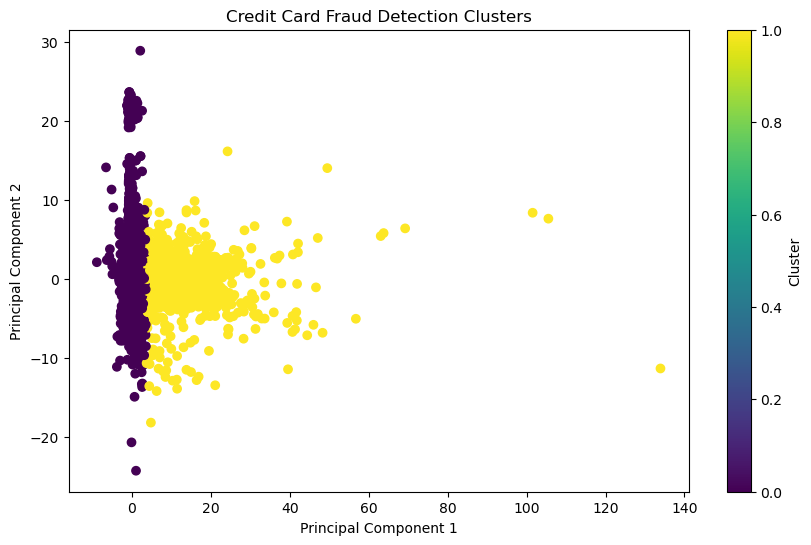

In [4]:
# Define variables
temp_df = df.drop('Class', axis=1)
inertias = []
max_clusters = 10

# Elbow method function
def elbow_method(data, max_clusters):
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

# Calculate inertias for different number of clusters
inertias = elbow_method(temp_df, max_clusters)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(inertias) + 1), inertias, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-number Determination')
plt.grid(True)
plt.show()

# Standardize variables
scaler = StandardScaler()
temp_df_scaled = scaler.fit_transform(temp_df)

# Perform dimensional reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(temp_df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principal_df)
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'], c=df['Cluster'], cmap='viridis')
plt.title('Credit Card Fraud Detection Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


# 3. Supervised learning : Classification

3.1 Model evaluation functions for classifiction

3.1 Split the data into training and testing data

In [90]:
# fucntion evaluates and returns test performance based on metrics scores
def evaluate_class_model(model, x_test, y_test):
    # predict the test data
    y_predict      = model.predict(x_test)
    
    # calculate metrics scores
    accuracy       = metrics.accuracy_score(y_test, y_predict)
    precision      = metrics.precision_score(y_test, y_predict)
    recall         = metrics.recall_score(y_test, y_predict)
    f1             = metrics.f1_score(y_test, y_predict)

    # calculate area under the curve
    y_predict_prob = model.predict_proba(x_test)[::,1]
    auc            = metrics.roc_auc_score(y_test, y_predict_prob)
    
    # return retrieved values
    return {'acc': accuracy, 'pre': precision, 'rec': recall, 'f1': f1, 'auc': auc}

# fucntion evaluates and returns scores necessary for ROC cuve graphing
def evaluate_class_graph(model, x_test, y_test):
    # predict the test data
    y_predict      = model.predict(x_test)

    # calculate area under the curve
    y_predict_prob = model.predict_proba(x_test)[::,1]
    fpr, tpr, _    = metrics.roc_curve(y_test, y_predict_prob)
    auc            = metrics.roc_auc_score(y_test, y_predict_prob)
    
     # return retrieved values
    return {'fpr': fpr, 'tpr': tpr}
    
# function evalutes and prints performance results
def print_class_metrics(results, model_name):
    # store each metrics into different variable
    accuracy       = np.nanmean(results['acc'])
    precision      = np.nanmean(results['pre'])
    recall         = np.nanmean(results['rec'])
    f1             = np.nanmean(results['f1'])
    auc            = np.nanmean(results['auc'])
   
    # print results 
    heading_length = 48
    print()
    print('='*heading_length)
    print(f'Cross validation metrics : {model_name}')
    print('='*heading_length)
    print(f'Accuracy                 : {accuracy*100:.2f}%')
    print(f'Precision                : {precision*100:.2f}%')
    print(f'Recall                   : {recall*100:.2f}%')
    print(f'F1                       : {f1*100:.2f}%')
    print(f'AUC                      : {auc*100:.2f}%')
    print('-'*heading_length)
    print()

In [48]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [49]:
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x, y, test_size = 0.2, 
                                                                     random_state = 42, stratify = y)

3.2 Use PowerTransformer to reduce set's skewness

In [50]:
# fit the powerTransformer
pt = preprocessing.PowerTransformer()
# transform the training set
cols = x_train.columns
pt.fit(x_train)
x_train = pt.transform(x_train)
# test the data
x_test = pt.transform(x_test)

In [9]:
# visualize the transformation
x_train = pd.DataFrame(x_train, columns=cols)
x_test = pd.DataFrame(x_test, columns=cols)
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.340415,1.336188,-0.544845,-0.965606,-0.420795,1.098808,2.530347,-1.195983,1.193358,1.254348,...,-0.176355,0.122260,0.393491,0.490592,1.218731,-0.694570,-0.802560,0.182260,-0.090864,-0.604334
1,0.647429,1.425774,-0.116737,-1.776576,0.252512,2.186342,2.157106,-0.000786,0.641573,0.094536,...,-0.296564,0.070475,0.296106,0.045872,1.252675,0.995295,-1.009446,-0.005501,-0.205597,-1.077975
2,-1.121157,-0.754387,0.330483,0.399881,-0.685256,-0.605729,1.414925,-1.789942,-3.636030,0.053256,...,1.674510,-4.186769,0.130424,-0.705914,-1.454362,1.664636,1.729490,0.083143,0.579844,1.205799
3,0.801868,1.686538,-0.960299,-0.630097,-1.249409,-1.008630,-0.179880,-1.154125,-0.068541,-1.042182,...,-0.636737,-0.177824,0.085261,0.327068,-0.924640,-0.562276,-0.262825,0.033199,-0.186850,-0.705232
4,-0.693594,-0.504203,-0.692345,-0.071695,-2.857635,0.512868,-0.008022,0.407953,-0.188334,0.011243,...,-0.358673,-0.323872,-0.258893,-0.022355,-1.981799,-0.588381,-0.223254,-0.092790,-0.190564,0.809789


3.3 Standardize the train and test set features

In [51]:
# standardize the train set feautres
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# standardize the test set feautres
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)

3.3 Logistic regression

In [91]:
# apply decision tree classifier
log_reg = LogisticRegressionClassifier()
log_reg.fit(x_train_scaled, y_train)

# evaluate and print performance
model_name = 'Logistic Regression'
log_reg_eval = evaluate_class_model(log_reg, x_test, y_test)
print_class_metrics(log_reg_eval, model_name)


Cross validation metrics : Logistic Regression
Accuracy                 : 99.92%
Precision                : 81.48%
Recall                   : 67.35%
F1                       : 73.74%
AUC                      : 96.85%
------------------------------------------------



3.4 Decision Tree

In [92]:
# apply decision tree classifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train_scaled, y_train)

# evaluate and print performance
model_name = 'DecisionTree'
dec_tree_eval = evaluate_class_model(dec_tree, x_test, y_test)
print_class_metrics(dec_tree_eval, model_name)


Cross validation metrics : DecisionTree
Accuracy                 : 99.91%
Precision                : 74.23%
Recall                   : 73.47%
F1                       : 73.85%
AUC                      : 86.71%
------------------------------------------------



3.5 Random Forest Classifier

In [93]:
# apply random forest classifier
ran_for = RandomForestClassifier()
ran_for.fit(x_train_scaled, y_train)

# evaluate and print performance
model_name = 'Random Forest'
ran_for_eval = evaluate_class_model(ran_for, x_test, y_test)
print_class_metrics(ran_for_eval, model_name)


Cross validation metrics : Random Forest
Accuracy                 : 99.96%
Precision                : 94.19%
Recall                   : 82.65%
F1                       : 88.04%
AUC                      : 96.29%
------------------------------------------------



In [107]:
# apply neural network classifier
neu_net = MLPClassifier()
neu_net.fit(x_train_scaled, y_train)

# evaluate and print performance
model_name = 'Neural Network'
neu_net_eval = evaluate_class_model(neu_net, x_test, y_test)
print_class_metrics(neu_net_eval, model_name)


Cross validation metrics : Neural Network
Accuracy                 : 99.95%
Precision                : 86.81%
Recall                   : 80.61%
F1                       : 83.60%
AUC                      : 97.62%
------------------------------------------------



3.6 Model comparison

    Graph a histogram for model metrics scores comparison 

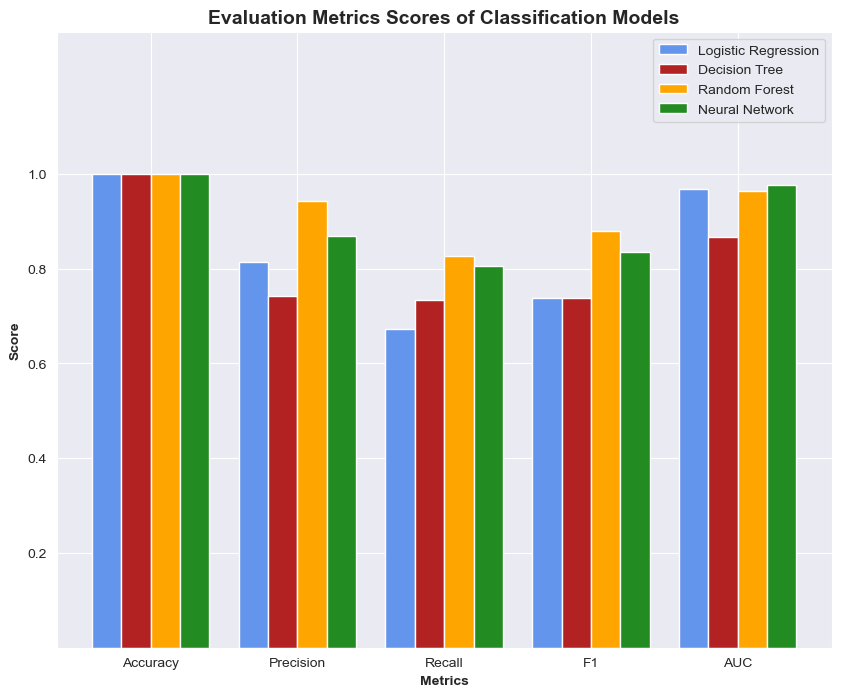

In [126]:
# intitialize figure for evaluation metrics
sns.set_style("darkgrid")
fig, ax1 = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(10)
fig.set_facecolor('white')

# store evaluation results
log_reg_score  = [log_reg_eval['acc'], log_reg_eval['pre'], log_reg_eval['rec'], 
                                        log_reg_eval['f1'], log_reg_eval['auc']]
dec_tree_score = [dec_tree_eval['acc'], dec_tree_eval['pre'], dec_tree_eval['rec'], 
                                        dec_tree_eval['f1'], dec_tree_eval['auc']]
ran_for_score  = [ran_for_eval['acc'], ran_for_eval['pre'], ran_for_eval['rec'], 
                                        ran_for_eval['f1'], ran_for_eval['auc']]
neu_net_score  = [ran_for_eval['acc'], neu_net_eval['pre'], neu_net_eval['rec'], 
                                        neu_net_eval['f1'], neu_net_eval['auc']]

# set the position of bar on X axis
barWidth = 0.2
r1 = np.arange(len(log_reg_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# make the plot
ax1.bar(r1, log_reg_score, color  = 'cornflowerblue', width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, dec_tree_score, color = 'firebrick', width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, ran_for_score, color  = 'orange', width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, neu_net_score, color  = 'forestgreen', width=barWidth, edgecolor='white', label='Neural Network')

# configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(log_reg_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
y=[0.2,0.4,0.6,0.8,1.0]
ax1.set_yticks(y)
ax1.set_ylim(0, 1.3)
ax1.set_title('Evaluation Metrics Scores of Classification Models', fontsize=14, fontweight='bold')
ax1.legend(loc='best')

plt.show()

    Graph ROC curves for model comparison

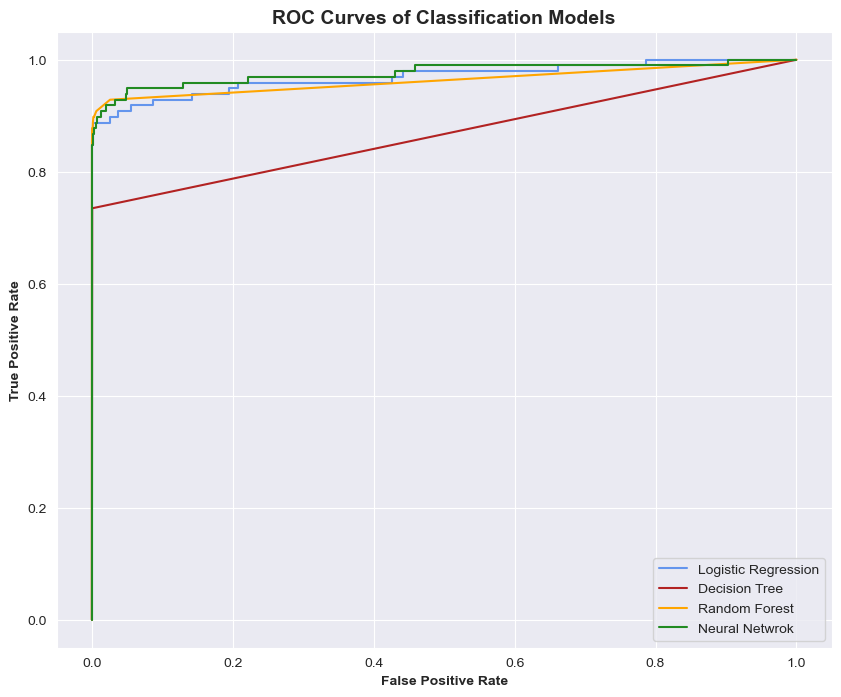

In [129]:
# intitialize figure for ROC curve
sns.set_style("darkgrid")
fig, ax2 = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(10)
fig.set_facecolor('white')

# plot ROC curve
log_reg_roc = evaluate_class_graph(log_reg, x_test, y_test)
ax2.plot(log_reg_roc['fpr'], log_reg_roc['tpr'],label='Logistic Regression', color = 'cornflowerblue')

dec_tree_roc = evaluate_class_graph(dec_tree, x_test, y_test)
ax2.plot(dec_tree_roc['fpr'], dec_tree_roc['tpr'],label='Decision Tree', color = 'firebrick')

ran_for_roc = evaluate_class_graph(ran_for, x_test, y_test)
ax2.plot(ran_for_roc['fpr'], ran_for_roc['tpr'],label='Random Forest', color = 'orange')

neu_net_roc = evaluate_class_graph(neu_net, x_test, y_test)
ax2.plot(neu_net_roc['fpr'], neu_net_roc['tpr'],label='Neural Netwrok', color = 'forestgreen')

# configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

# create legend & title
ax2.set_title('ROC Curves of Classification Models', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()


# 4. Supervised learning : Regression

In [8]:
%matplotlib inline

import numpy as np
import pandas as pd 
from   sklearn                import datasets

# data graphing
import matplotlib.pyplot as plt
import seaborn as sns

# data pre-processing
from   sklearn                import model_selection
from   sklearn                import preprocessing
from   sklearn.preprocessing  import StandardScaler

# supervised : regression
from   sklearn                import metrics, linear_model
from sklearn.linear_model     import Ridge
from sklearn.ensemble         import GradientBoostingRegressor

# ignore warning
from   warnings               import filterwarnings
filterwarnings('ignore')

In [5]:
# import set
df = pd.read_csv("creditcard.csv")

# drop columns
drop_cols = ['Time', 'V13', 'V15', 'V22', 'V24', 'V25', 'V26', 'V28']
df = df.drop(drop_cols, axis = 1)

# identify variables 
x = df.drop('Class', axis = 1)
y = df['Class']

In [10]:
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x, y, test_size = 0.2, 
                                                                     random_state = 42, stratify = y)

# fit the powerTransformer
pt = preprocessing.PowerTransformer()
# transform the training set
cols = x_train.columns
pt.fit(x_train)
x_train = pt.transform(x_train)
# test the data
x_test = pt.transform(x_test)

In [11]:
# standardize the train set feautres
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# standardize the test set feautres
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)

4.1 Model evaluation funtions for regression

In [37]:
# fucntion evaluates and returns test performance based on metrics scores
def evaluate_reg_model(model, x_test, y_test):
    # predict the test data
    y_predict      = model.predict(x_test)
    
    # calculate metrics scores
    r2       = metrics.r2_score(y_test, y_predict)
    mae      = metrics.mean_absolute_error(y_test, y_predict)
    mse      = metrics.mean_squared_error(y_test, y_predict)
    rmse     = np.sqrt(metrics.mean_absolute_error(y_test, y_predict))

    # return retrieved values
    return {'r2': r2, 'mae': mae, 'mse': mse, 'rmse': rmse,}


# function evalutes and prints performance results
def print_reg_metrics(results, model_name):   
    # store each metrics into different variable
    r2       = np.nanmean(results['r2'])
    mae      = np.nanmean(results['mae'])
    mse      = np.nanmean(results['mse'])
    rmse     = np.nanmean(results['rmse'])
    coef     = lin_reg.coef_
    intr     = lin_reg.intercept_
    
    # print results 
    heading_length = 100
    print()
    print('='*heading_length)
    print(f'Cross validation metrics : {model_name}')
    print('='*heading_length)
    print(f'R Squared                : {r2:.10f}')
    print(f'Mean Absolute Error      : {mae:.10f}')
    print(f'Mean Squared Error       : {mse:.10f}')
    print(f'Root Mean Squared Error  : {rmse:.10f}')
    print(f'Regression Intercept     : {intr}')
    print(f'Regression Coefficients  : {coef}')
    print('-'*heading_length)
    print()


4.2 Linear regression

In [55]:
# apply linear regression
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train_scaled, y_train)

# evaluate and print performance
model_name = 'Linear Regression'
lin_reg_eval = evaluate_reg_model(lin_reg, x_test, y_test)
print_reg_metrics(lin_reg_eval, model_name)


Cross validation metrics : Linear Regression
R Squared                : 0.2190835592
Mean Absolute Error      : 0.1650809571
Mean Squared Error       : 0.0622900857
Root Mean Squared Error  : 0.4063015593
Regression Intercept     : 0.0874025
Regression Coefficients  : [ 0.0518475   0.01181146  0.1073188  -0.03159706 -0.01735667 -0.02851591
  0.05426982]
----------------------------------------------------------------------------------------------------



4.3 Ridge regression

In [56]:
# apply ridge regression
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_reg.fit(x_train_scaled, y_train)

# evaluate and print performance
model_name = 'Ridge Regression'
ridge_reg_eval = evaluate_reg_model(ridge_reg, x_test_scaled, y_test)
print_reg_metrics(ridge_reg_eval, model_name)


Cross validation metrics : Ridge Regression
R Squared                : 0.2190822023
Mean Absolute Error      : 0.1651154428
Mean Squared Error       : 0.0622901939
Root Mean Squared Error  : 0.4063439957
Regression Intercept     : 0.0874025
Regression Coefficients  : [ 0.0518475   0.01181146  0.1073188  -0.03159706 -0.01735667 -0.02851591
  0.05426982]
----------------------------------------------------------------------------------------------------



In [57]:
# apply gradient goosting regression
gb_reg = GradientBoostingRegressor()  
gb_reg.fit(x_train_scaled, y_train)

# evaluate and print performance
model_name = 'Gradient Boosting Regression'
gb_reg_eval = evaluate_reg_model(gb_reg, x_test_scaled, y_test)
print_reg_metrics(gb_reg_eval, model_name)


Cross validation metrics : Gradient Boosting Regression
R Squared                : 0.9521122478
Mean Absolute Error      : 0.0196864366
Mean Squared Error       : 0.0038197841
Root Mean Squared Error  : 0.1403083624
Regression Intercept     : 0.0874025
Regression Coefficients  : [ 0.0518475   0.01181146  0.1073188  -0.03159706 -0.01735667 -0.02851591
  0.05426982]
----------------------------------------------------------------------------------------------------



4.4 Model Comparison 

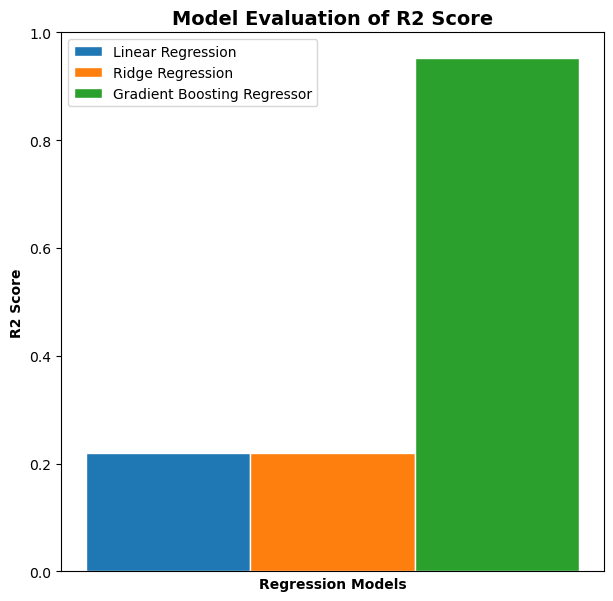

In [68]:
fig, ax1 = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
fig.set_facecolor('white')

barWidth = 0.15
lin_reg_r2 = [lin_reg_eval['r2']]
ridge_reg_r2 = [ridge_reg_eval['r2']]
gb_reg_r2 = [gb_reg_eval['r2']]

r1 = np.arange(len(lin_reg_r2))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

ax1.bar(r1, lin_reg_r2, width=barWidth, edgecolor='white', label='Linear Regression')
ax1.bar(r2, ridge_reg_r2, width=barWidth, edgecolor='white', label='Ridge Regression')
ax1.bar(r3, gb_reg_r2, width=barWidth, edgecolor='white', label='Gradient Boosting Regressor')

ax1.set_xlabel('Regression Models', fontweight='bold')
ax1.set_xticks([])
ax1.set_ylabel('R2 Score', fontweight='bold')
ax1.set_ylim(0, 1)

ax1.set_title('Model Evaluation of R2 Score', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

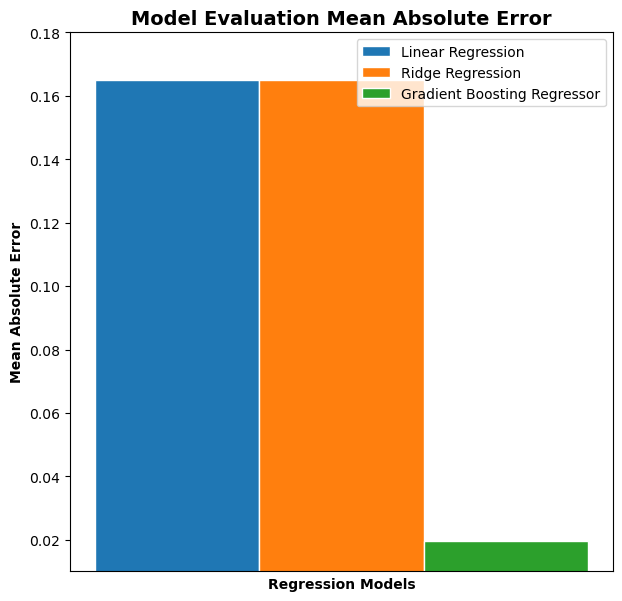

In [70]:
fig, ax1 = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
fig.set_facecolor('white')

barWidth = 0.15
lin_reg_mae = [lin_reg_eval['mae']]
ridge_reg_mae = [ridge_reg_eval['mae']]
gb_reg_mae = [gb_reg_eval['mae']]

r1 = np.arange(len(lin_reg_mae))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

ax1.bar(r1, lin_reg_mae, width=barWidth, edgecolor='white', label='Linear Regression')
ax1.bar(r2, ridge_reg_mae, width=barWidth, edgecolor='white', label='Ridge Regression')
ax1.bar(r3, gb_reg_mae, width=barWidth, edgecolor='white', label='Gradient Boosting Regressor')

ax1.set_xlabel('Regression Models', fontweight='bold')
ax1.set_xticks([])
ax1.set_ylabel('Mean Absolute Error', fontweight='bold')
ax1.set_ylim(0.01, 0.18)

ax1.set_title('Model Evaluation Mean Absolute Error', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

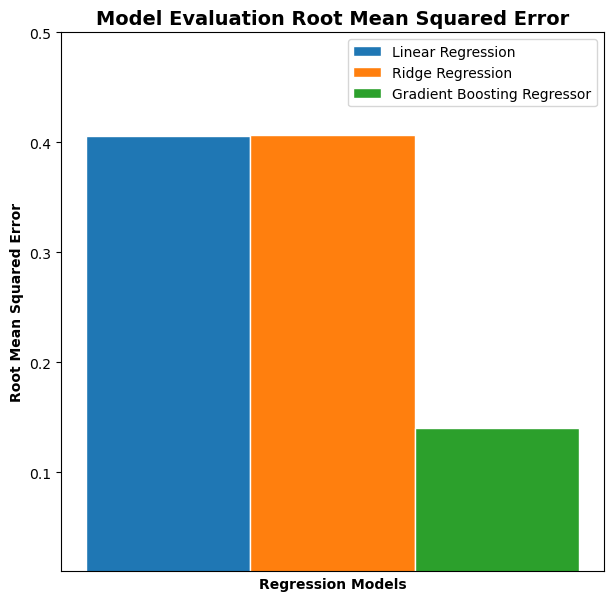

In [71]:
fig, ax1 = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
fig.set_facecolor('white')

barWidth = 0.15
lin_reg_mae = [lin_reg_eval['rmse']]
ridge_reg_mae = [ridge_reg_eval['rmse']]
gb_reg_mae = [gb_reg_eval['rmse']]

r1 = np.arange(len(lin_reg_rmse))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

ax1.bar(r1, lin_reg_rmse, width=barWidth, edgecolor='white', label='Linear Regression')
ax1.bar(r2, ridge_reg_rmse, width=barWidth, edgecolor='white', label='Ridge Regression')
ax1.bar(r3, gb_reg_rmse, width=barWidth, edgecolor='white', label='Gradient Boosting Regressor')

ax1.set_xlabel('Regression Models', fontweight='bold')
ax1.set_xticks([])
ax1.set_ylabel('Root Mean Squared Error', fontweight='bold')
ax1.set_ylim(0.01, 0.5)

ax1.set_title('Model Evaluation Root Mean Squared Error', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()